In [184]:
# run this on top of all of Your notebooks -- it does all the dirty imports.
exec(open('initialize_jupyter_handybeam.py').read())
import strathclyde

# Use the Array Builder

## Set up the Array Builder with some initial parameters

In [206]:
importlib.reload(strathclyde) # this makes sure that any changes to the source code are being used in this session
array_builder=strathclyde.LinearArray(
    radiation_frequency=40e3,
    sound_velocity=343,
    sampling_density=11,
    passive_aperture=64e-3,
    element_pitch=12e-3,
    element_width=11e-3,
    element_count=16,
    focal_point=(0.0e-3,100.0e-3,150e-3))
array_builder

Basic linear probe:
> Environment:
>>   radiation frequency: 40.0kHz
>>   sound_velocity :343.0m/s
>>   sound wave length :8.575mm
>>   medium wavenumber: 116.6[waves/meter]
>>   point sources sampling density: 11pt/lambda linear, spacing of 0.780mm
  
> Probe definition:
>>   Passive aperture: 64.0mm
>>   element width: 11.000mm
>>   element count: 16
  
> Probe calculated properties:
>>   inter-element gap: 1.0mm
>>   Active aperture: 192.0mm
>>   Active aperture near field transition: 1074.8mm
>>   Passive aperture near field transition: 119.4mm
>>   Active aperture near field transition: 1074.8mm
  
> Focal point calculated properties:
>>   focal distance: 180.3mm
>>   active aperture -6dB focal spot size: 8.2mm
>>   passive aperture -6dB natural focus spot size: 16.3mm

## Visualize the settings of the Array Builder

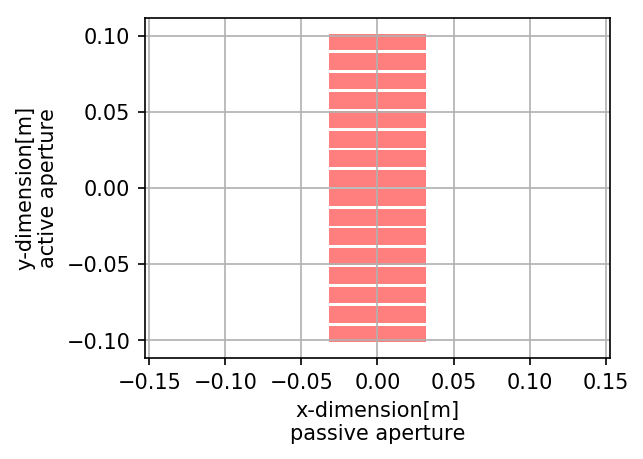

In [207]:
array_builder.visualize_array_elements() # visualize with output to screen
array_builder.visualize_array_elements(filename='example_visualize_array_elements.png') # save figure to disk

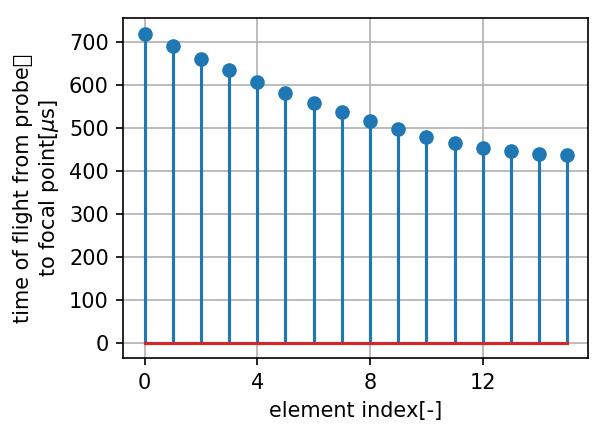

In [208]:
array_builder.visualize_time_of_flight() # visualize with output to screen
array_builder.visualize_time_of_flight(filename='example_visualize_time_of_flight.png') # save figure to disk

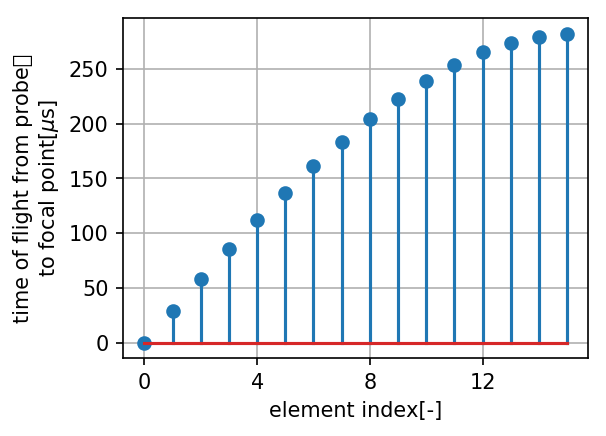

In [209]:
array_builder.visualize_focal_laws()
array_builder.visualize_focal_laws(filename='example_visualize_focal_laws.png')

In [210]:
# these are avaliable properties and methods
# dir(array_builder)

In [211]:
#??array_builder.focal_distance

### Visualizes the point cloud of points that simulate the element aperture

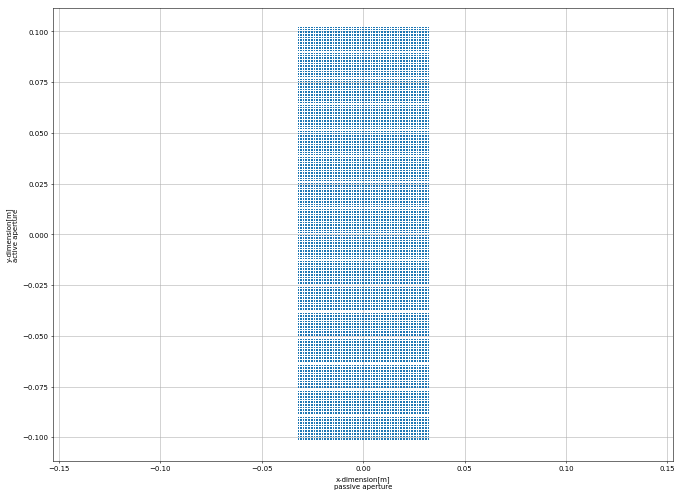

In [212]:
array_builder.visualize_point_cloud_all_elements(figsize=(16,12),dpi=50)
array_builder.visualize_point_cloud_all_elements(figsize=(16,12),dpi=50,filename='example_point_cloud_all_elements.png')

## Create the HandyBeam simulation object

In [213]:
handybeam_world = array_builder.create_handybeam_world()

# Use the HandyBeam package

## set up the pressure field sampling grids

In [214]:
# Set grid spacing per wavelength for rectilinear sampling grid.

grid_spacing_per_wavelength = 0.2

# Set grid extent around the origin.

grid_extent_around_origin_x = 0.3
grid_extent_around_origin_y = 0.3

# Set plane height 

sampler_grid_centre = 300e-3

# Add a rectilinear sampling grid to the world.
importlib.reload(handybeam.samplers.rectilinear_sampler)
rectilinear_sampler_xz = \
    handybeam_world.add_sampler(
    handybeam.samplers.rectilinear_sampler.RectilinearSampler(
        parent = handybeam_world,
        origin = np.array((0,0,sampler_grid_centre)),
        grid_spacing_per_wavelength = grid_spacing_per_wavelength,
        grid_extent_around_origin_x = grid_extent_around_origin_x,
        grid_extent_around_origin_y = grid_extent_around_origin_y,
        normal_vector=np.array((1,0,0)),
        parallel_vector=np.array((0,-1,0)),
        align_grid_size_to_gpu = 64
        )
    )
print(rectilinear_sampler_xz)

grid_extent_around_origin_x = 0.3
grid_extent_around_origin_y = 0.3
sampler_grid_centre = 150e-3

rectilinear_sampler_xy = \
    handybeam_world.add_sampler(
    handybeam.samplers.rectilinear_sampler.RectilinearSampler(
        parent = handybeam_world,
        origin = np.array((0,0,sampler_grid_centre)),
        grid_spacing_per_wavelength = grid_spacing_per_wavelength,
        grid_extent_around_origin_x = grid_extent_around_origin_x,
        grid_extent_around_origin_y = grid_extent_around_origin_y,
        normal_vector=np.array((0,0,1)),
        parallel_vector=np.array((0,-1,0)),
        align_grid_size_to_gpu = 64
        )
    )
print(rectilinear_sampler_xy)

RectilinearSampler: 384x384 points, spacing 1.71500mm
RectilinearSampler: 384x384 points, spacing 1.71500mm


In [215]:
# get some details about the points in the tx array descriptor
print(handybeam_world.tx_array.tx_array_element_descriptor.shape)
print(handybeam_world.tx_array.tx_array_element_descriptor.dtype)
print(handybeam_world.tx_array.describe_element(0))

(19920, 16)
float32
element 0: 
 >        (xyz) =(-32.0, -101.5, 0.0)mm
 >    (normals) =(0.0, 0.0, 1.0)
 > (dir coeffs) =(phase_c1:0.0, | amp:(1.0, 0.0, 0.0)
 >  amp setting =1.0
 >        phase =0.0
 >       (nans) =(nan, nan, nan, nan) 



## Ask the pressure fields to be computed, or "propagated"

In [216]:
rectilinear_sampler_xz.propagate(print_performance_feedback=True)
rectilinear_sampler_xy.propagate(print_performance_feedback=True)

global_work_size: (384, 384, 1)
local_work_size:  (384, 1, 1)
profiling: info:
profiling: wall time: 0.3480[sec] == 2.9[FPS]
profiling: kernel time : 343824.4[us] == 2.9[FPS]
profiling: compute performance: 8543.1[MRays/sec]
profiling: memcopy time: 925.2[us] == 1080.8[FPS]
profiling: memcopy bandwidth: 3.0[GB/sec]
profiling: command bandwidth: 120656.4[CPS]
global_work_size: (384, 384, 1)
local_work_size:  (384, 1, 1)
profiling: info:
profiling: wall time: 0.3111[sec] == 3.2[FPS]
profiling: kernel time : 307647.5[us] == 3.3[FPS]
profiling: compute performance: 9547.7[MRays/sec]
profiling: memcopy time: 884.4[us] == 1130.8[FPS]
profiling: memcopy bandwidth: 3.1[GB/sec]
profiling: command bandwidth: 111607.1[CPS]


## Visualize the general acoustic field generated

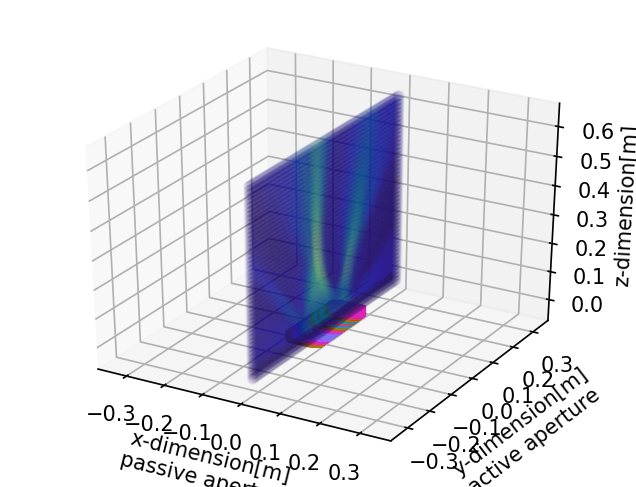

In [217]:
import handybeam.visualise
importlib.reload(handybeam.visualise)
handybeam.visualise.visualize_3D_only(handybeam_world,samplers=[handybeam_world.samplers[0]],alpha=0.02)
handybeam.visualise.visualize_3D_only(handybeam_world,samplers=[handybeam_world.samplers[0]],alpha=0.02,filename="field_xz_3D.png")

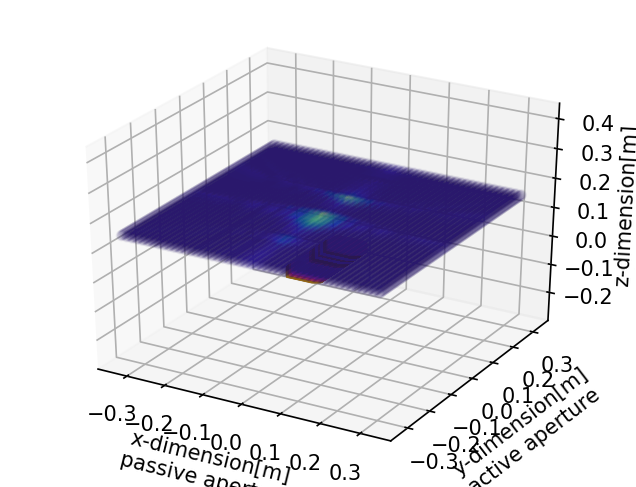

In [218]:
handybeam.visualise.visualize_3D_only(handybeam_world,samplers=[handybeam_world.samplers[1]],alpha=0.03)
handybeam.visualise.visualize_3D_only(handybeam_world,samplers=[handybeam_world.samplers[1]],alpha=0.03,filename="field_xy_3D.png")

In [219]:
# You can get the actual pressures (complex numbers) from here:
# feel free to visualize and process these Yourself

# rectilinear_sampler_xz.pressure_field
# rectilinear_sampler_xz.coordinates
# dir(rectilinear_sampler_xz)


# -=========== FRONTIER ============
Things below this line need development  ------



In [220]:
limits=get_rectilinear_sampler_coordinates_maxmin(rectilinear_sampler_xz.coordinates)
limits

(0.0, 0.0, 0.32928002, -0.327565, 0.62928003, -0.027565002)

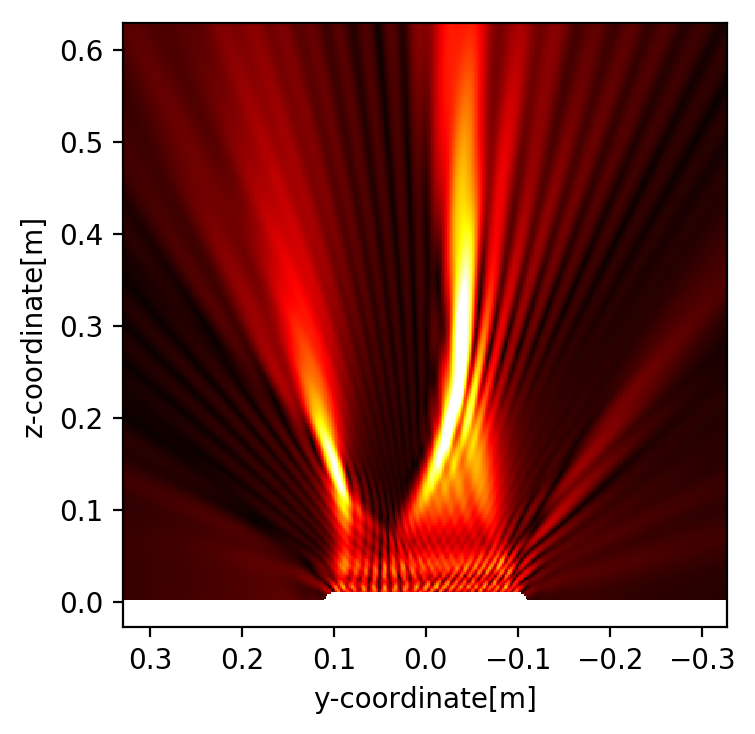

In [221]:
visualize_2d_amplitude_xz(rectilinear_sampler_xz)


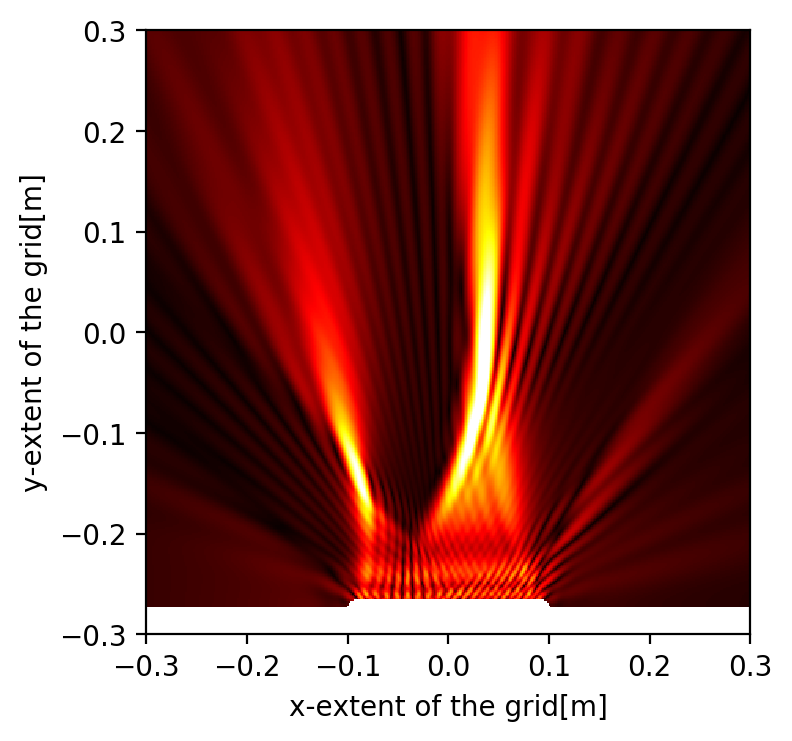

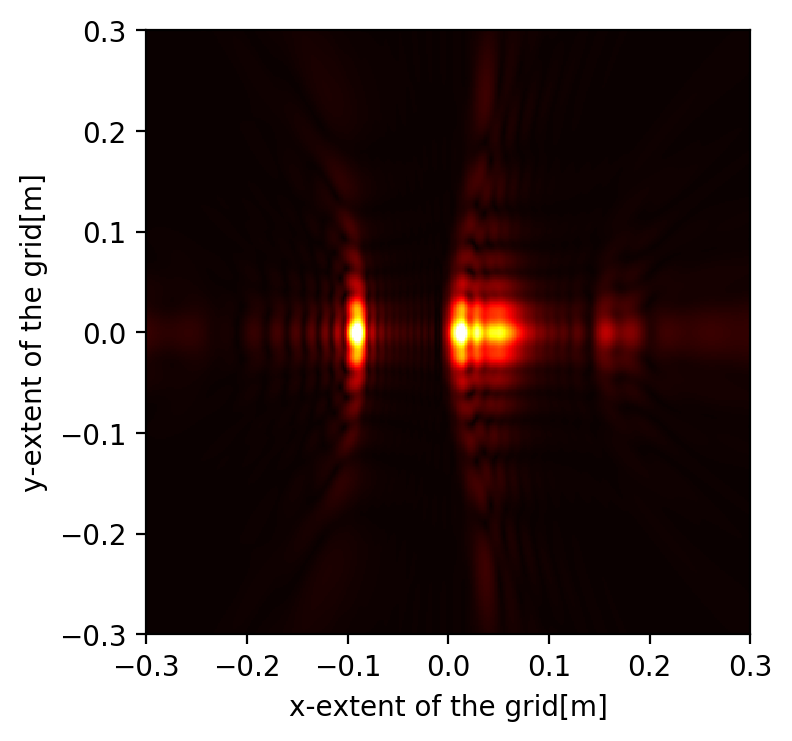

In [222]:
visualize_2d_amplitude(rectilinear_sampler_xz)
visualize_2d_amplitude(rectilinear_sampler_xy)

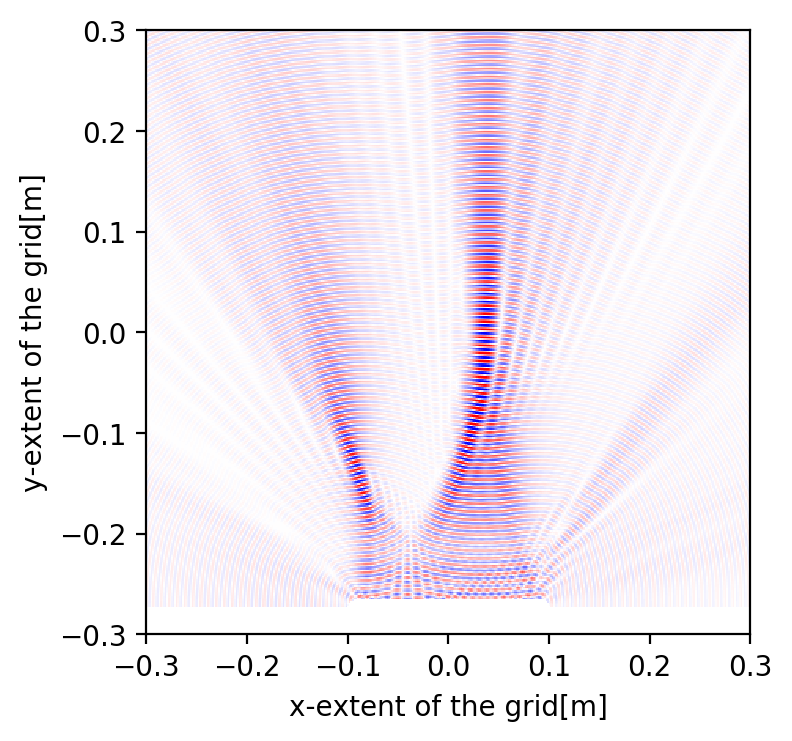

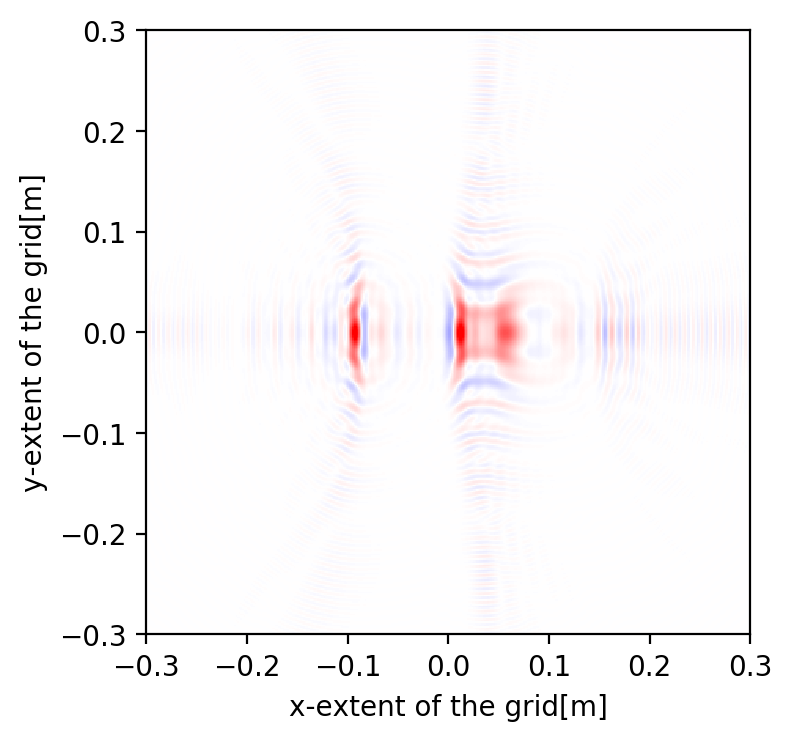

In [223]:
visualize_2d_real(rectilinear_sampler_xz)
visualize_2d_real(rectilinear_sampler_xy)

In [224]:
np.mod(array_builder.focal_laws_phases,np.pi*2)

array([[0.        ],
       [1.07126169],
       [1.93873725],
       [2.57500275],
       [2.94863729],
       [3.02381274],
       [2.75997037],
       [2.11167133],
       [1.02874022],
       [5.74003691],
       [3.62190944],
       [0.89925005],
       [3.79869395],
       [5.98571552],
       [1.13485763],
       [1.78299231]])

In [204]:
import handybeam.cl_system

In [205]:
handybeam.cl_system.print_cl_platforms()

------------
platform: 0, name = NVIDIA CUDA
--- platform 0, device 0 : name= GeForce GTX 1070 with Max-Q Design
------------
platform: 1, name = Intel(R) OpenCL
--- platform 1, device 0 : name= Intel(R) UHD Graphics 630
--- platform 1, device 1 : name= Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz


In [ ]:
import this

In [ ]:
import antigravity

## export the focal laws (delays and gains) to Onscale

In [148]:

print(array_builder.export_focal_laws_to_onscale(filename="onscale_focal_laws.txt"))


symb tshift0 = 0.000000e+00
symb eweight0 = 1.000000e+00
symb tshift1 = 1.912753e-05
symb eweight1 = 1.000000e+00
symb tshift2 = 3.612496e-05
symb eweight2 = 1.000000e+00
symb tshift3 = 5.076037e-05
symb eweight3 = 1.000000e+00
symb tshift4 = 6.280647e-05
symb eweight4 = 1.000000e+00
symb tshift5 = 7.205396e-05
symb eweight5 = 1.000000e+00
symb tshift6 = 7.832670e-05
symb eweight6 = 1.000000e+00
symb tshift7 = 8.149677e-05
symb eweight7 = 1.000000e+00
symb tshift8 = 8.149677e-05
symb eweight8 = 1.000000e+00
symb tshift9 = 7.832670e-05
symb eweight9 = 1.000000e+00
symb tshift10 = 7.205396e-05
symb eweight10 = 1.000000e+00
symb tshift11 = 6.280647e-05
symb eweight11 = 1.000000e+00
symb tshift12 = 5.076037e-05
symb eweight12 = 1.000000e+00
symb tshift13 = 3.612496e-05
symb eweight13 = 1.000000e+00
symb tshift14 = 1.912753e-05
symb eweight14 = 1.000000e+00
symb tshift15 = 0.000000e+00
symb eweight15 = 1.000000e+00

